In [1]:
from scipy import stats
from scipy.interpolate import interp2d,CloughTocher2DInterpolator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
import matplotlib.style

matplotlib.style.use('./publication.mplstyle')
matplotlib.style.available
plt.rcParams['axes.grid'] = False

In [3]:
# The BNS data without GW constraints
df = pd.read_csv('./MCL_BNS_new.dat',delim_whitespace=True)
#df = df.sort_values(by=[‘mass’])

mass = df['mass'].tolist()

tides = df['tides'].tolist()
prob = df['prob'].tolist()
prob = np.array(prob)
tides = np.array(tides)
mass = np.array(mass)

/var/folders/cg/0bw3vjvs2s3cc7cjt_43pps1jw1ghg/T/ipykernel_81927/2518861527.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(tides,mass,c=np.log10(prob),cmap='Purples',alpha=1.0)


0.803015
1.996985


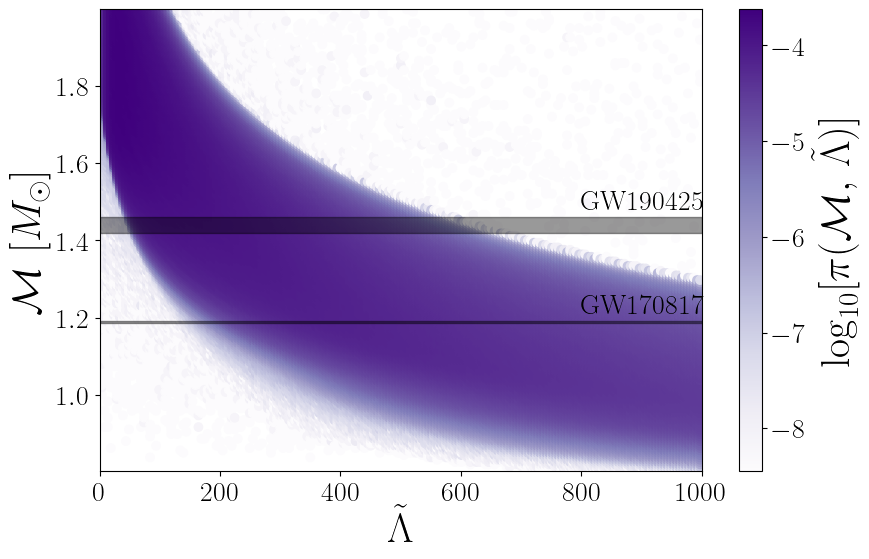

In [4]:
#plt.figure()
plt.scatter(tides,mass,c=np.log10(prob),cmap='Purples',alpha=1.0)
#plt.axhspan(1.186, 1.192, color='k', alpha=0.4)
#plt.annotate(r'GW170817', (800,1.212), fontsize=20)

# GW190425
# plt.axhline(1.44, c='k', ls='-.')
plt.axhspan(1.42, 1.46, color='k', alpha=0.4)
plt.annotate(r'GW190425', (800,1.48), fontsize=20)
plt.colorbar(label=r'$\rm \log_{10}[\pi(\mathcal{M},\,\tilde{\Lambda})]$')
# GW170817
# plt.axhline(1.186, c='k', ls='--')
plt.axhspan(1.186, 1.192, color='k', alpha=0.4)
plt.annotate(r'GW170817', (800,1.212), fontsize=20)
plt.xlim(0, 1000)
plt.ylim(min(mass), max(mass))
print(min(mass))
print(max(mass))
plt.ylabel(r'$\mathcal{M}\,\left[M_\odot\right]$')
plt.xlabel(r'$\tilde{\Lambda}$')
#ax1.set_aspect('equal', adjustable='box')
#ax2.set_aspect('equal', adjustable='box')
#figure.tight_layout()
plt.savefig('BNS_chirpmass_prior_noGW.png',dpi=500,bbox_inches='tight')

In [5]:
# The BNS data without GW constraints
df = pd.read_csv('./MCL_NSBH_new.dat',delim_whitespace=True)
#df = df.sort_values(by=[‘mass’])

mass2 = df['mass'].tolist()

tides2 = df['tides'].tolist()
prob2 = df['prob'].tolist()
prob2 = np.array(prob2)
tides2 = np.array(tides2)
mass2 = np.array(mass2)

/var/folders/cg/0bw3vjvs2s3cc7cjt_43pps1jw1ghg/T/ipykernel_81927/2624076768.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(tides2,mass2,c=np.log10(prob2),cmap='Purples',alpha=1.0)


0.805528
2.994472


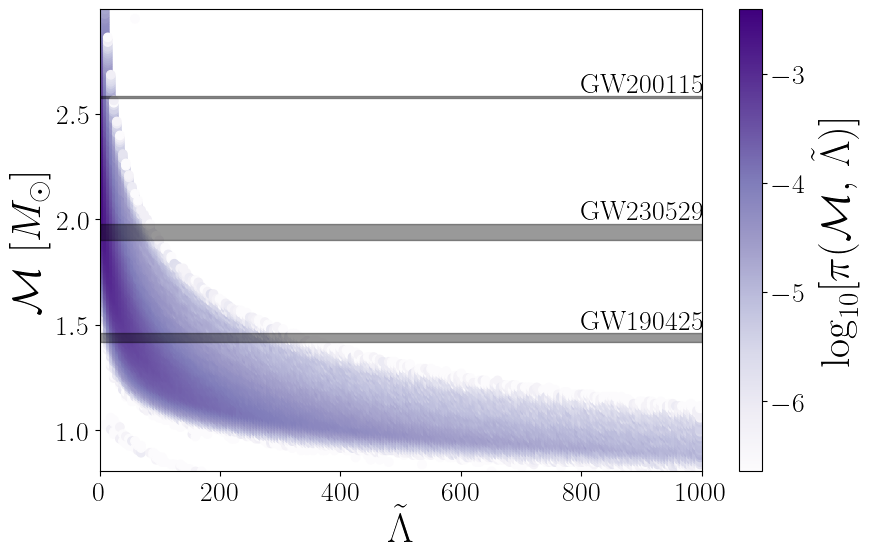

In [6]:
plt.scatter(tides2,mass2,c=np.log10(prob2),cmap='Purples',alpha=1.0)
#plt.axhspan(1.186, 1.192, color='k', alpha=0.4)
#plt.annotate(r'GW170817', (800,1.212), fontsize=20)

# GW190425
# plt.axhline(1.44, c='k', ls='-.')
plt.axhspan(1.42, 1.46, color='k', alpha=0.4)
plt.annotate(r'GW190425', (800,1.48), fontsize=20)
#GW190814,
plt.axhspan(6.09-0.06, 6.09+0.06, color='k', alpha=0.4)
plt.annotate(r'GW190814', (800,6.09), fontsize=20)
#GW230529
plt.axhspan(1.94-0.04, 1.94+0.04, color='k', alpha=0.4)
plt.annotate(r'GW230529', (800,2.0), fontsize=20)

# Les entfants terrible
# 105 is TOO LARGE
#GW200105,
 
#GW200115
plt.axhspan(2.58-0.007, 2.58+0.006, color='k', alpha=0.4)
plt.annotate(r'GW200115', (800,2.6), fontsize=20)

plt.colorbar(label=r'$\rm \log_{10}[\pi(\mathcal{M},\,\tilde{\Lambda})] $')
plt.xlim(0, 1000)
plt.ylim(min(mass2), max(mass2))
print(min(mass2))
print(max(mass2))
#plt.ylim(0.8030150753768844,1.996984924623116)
plt.ylabel(r'$\mathcal{M}\,\left[M_\odot\right]$')
plt.xlabel(r'$\tilde{\Lambda}$')
plt.savefig('NSBH_chirpmass_prior_noGW.png',dpi=500,bbox_inches='tight')

/var/folders/cg/0bw3vjvs2s3cc7cjt_43pps1jw1ghg/T/ipykernel_81927/1949774140.py:5: RuntimeWarning: divide by zero encountered in log10
  im1 = ax[0].scatter(tides, mass, c=np.log10(prob), cmap='Purples', alpha=1.0)
/var/folders/cg/0bw3vjvs2s3cc7cjt_43pps1jw1ghg/T/ipykernel_81927/1949774140.py:18: RuntimeWarning: divide by zero encountered in log10
  im2 = ax[1].scatter(tides2, mass2, c=np.log10(prob2), cmap='Purples', alpha=1.0)


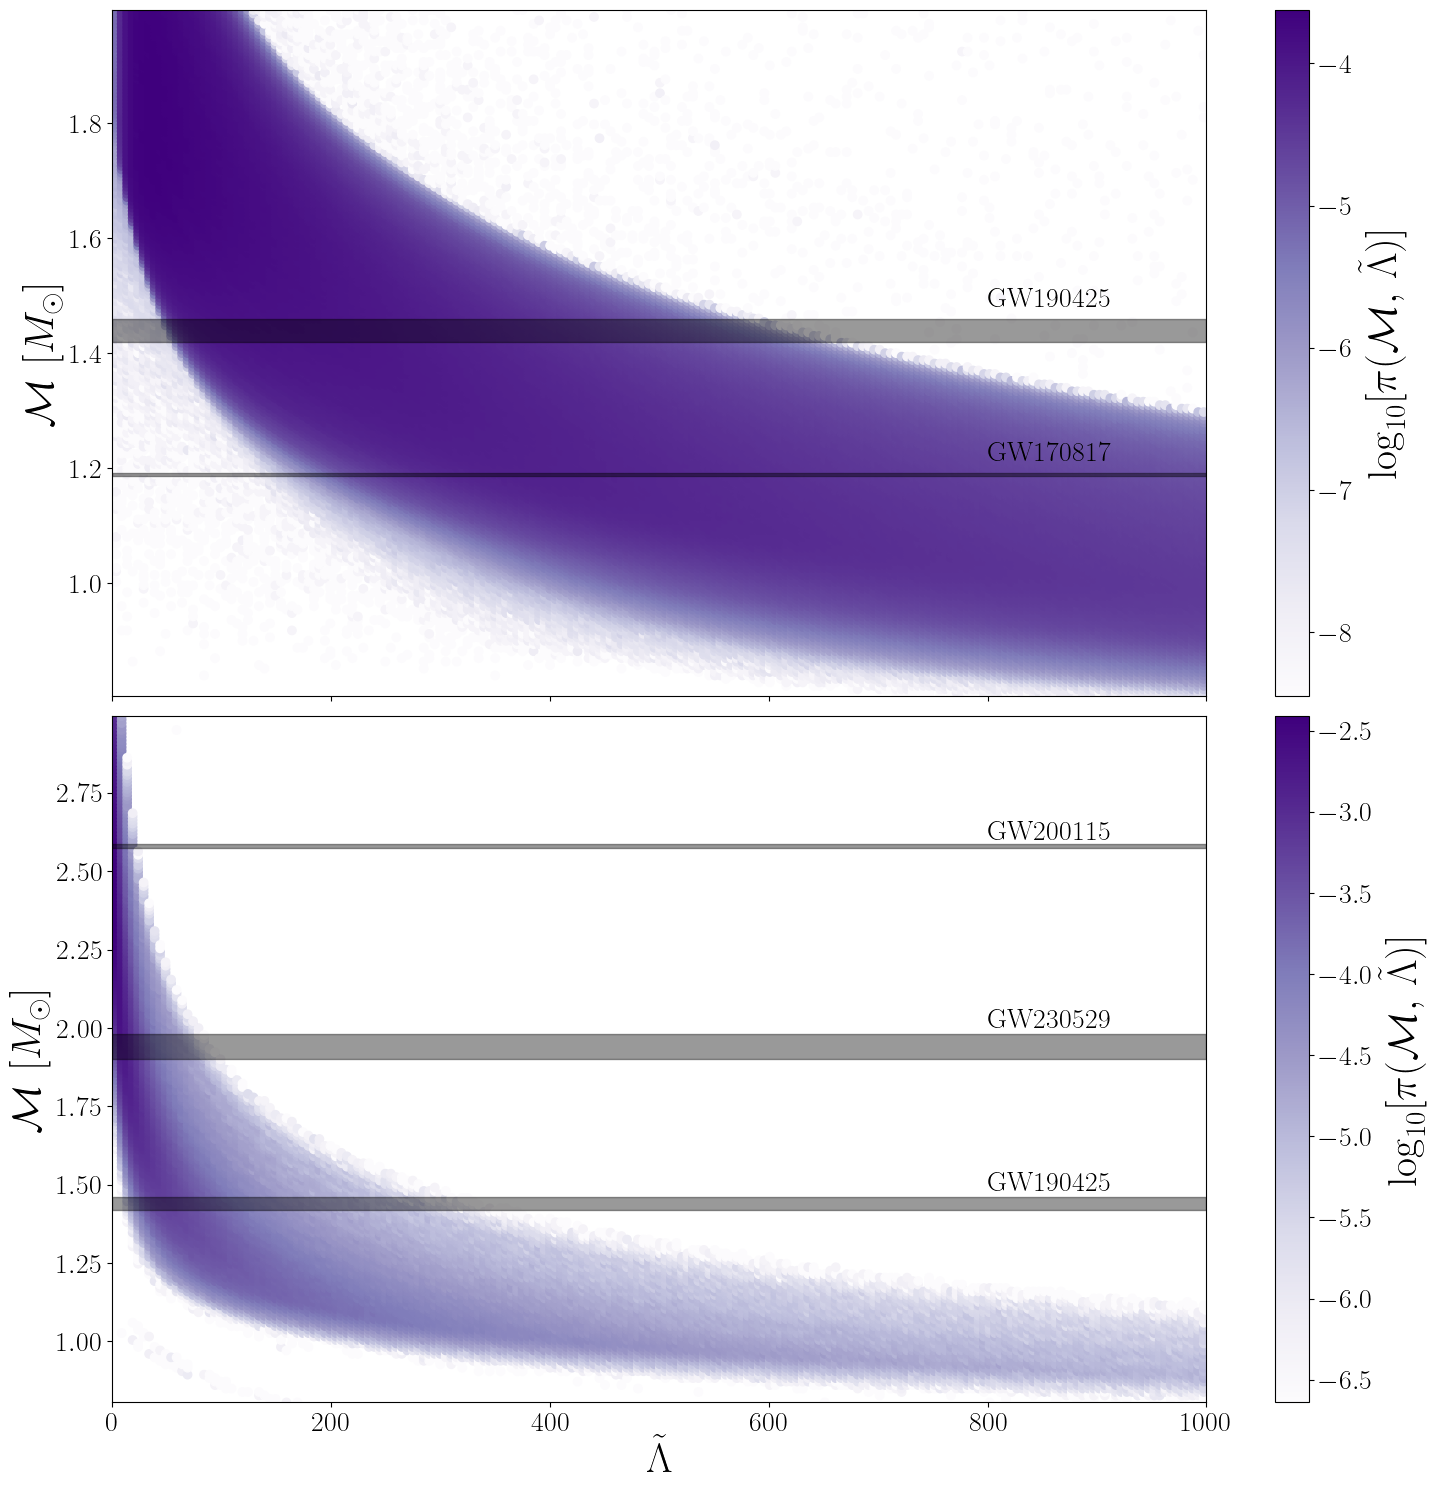

In [7]:
# Create a figure with subplots
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15, 15))

# Plot the first panel (BNS)
im1 = ax[0].scatter(tides, mass, c=np.log10(prob), cmap='Purples', alpha=1.0)
ax[0].axhspan(1.42, 1.46, color='k', alpha=0.4)
ax[0].annotate(r'GW190425', (800, 1.48), fontsize=20)
ax[0].axhspan(1.186, 1.192, color='k', alpha=0.4)
ax[0].annotate(r'GW170817', (800, 1.212), fontsize=20)
ax[0].set_xlim(0, 1000)
ax[0].set_ylim(min(mass), max(mass))
ax[0].set_ylabel(r'$\mathcal{M}\,\left[M_\odot\right]$')

# Add a color bar to the first subplot
fig.colorbar(im1, ax=ax[0], label=r'$\rm \log_{10}[\pi(\mathcal{M},\,\tilde{\Lambda})]$')

# Plot the second panel (NSBH)
im2 = ax[1].scatter(tides2, mass2, c=np.log10(prob2), cmap='Purples', alpha=1.0)
ax[1].axhspan(1.42, 1.46, color='k', alpha=0.4)
ax[1].annotate(r'GW190425', (800, 1.48), fontsize=20)
ax[1].axhspan(6.09 - 0.06, 6.09 + 0.06, color='k', alpha=0.4)
ax[1].annotate(r'GW190814', (800, 6.09), fontsize=20)
ax[1].axhspan(1.94 - 0.04, 1.94 + 0.04, color='k', alpha=0.4)
ax[1].annotate(r'GW230529', (800, 2.0), fontsize=20)
ax[1].axhspan(2.58 - 0.007, 2.58 + 0.006, color='k', alpha=0.4)
ax[1].annotate(r'GW200115', (800, 2.6), fontsize=20)
ax[1].set_xlim(0, 1000)
ax[1].set_ylim(min(mass2), max(mass2))
ax[1].set_ylabel(r'$\mathcal{M}\,\left[M_\odot\right]$')
ax[1].set_xlabel(r'$\tilde{\Lambda}$')

# Add a color bar to the second subplot
fig.colorbar(im2, ax=ax[1], label=r'$\rm \log_{10}[\pi(\mathcal{M},\,\tilde{\Lambda})]$')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Fig_1_Physics_priors.pdf', dpi=500)
plt.show()
